In [1]:
import pandas as pd
import json 
import os 
import sys
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

path = '../data/llama2_7b'

In [3]:
def get_results(path): 
    res = []
    with open(os.path.join(path)) as f:
        for line in f:
            res.append(json.loads(line))

    monitor_losses = []
    gcg_losses = []
    early_stop = []
    for r in res:
        monitor_losses.append(r['monitor_losses'])
        gcg_losses.append(r['gcg_losses'])
        early_stop.append(np.any(r['early_stopping']))

    monitor_losses = np.array(monitor_losses)
    gcg_losses = np.array(gcg_losses)
    early_stop = np.array(early_stop)
    return monitor_losses, gcg_losses, early_stop

monitor_losses, gcg_losses, early_stop = get_results(os.path.join(path, 'gcg_run_llama_guard.json'))
hb_alpaca_monitor_losses, hb_alpaca_gcg_losses, hb_alpaca_early_stop = get_results(os.path.join(path, 'gcg_run_harmbench_alpaca.json'))
hb_alpaca_8_monitor_losses, hb_alpaca_8_gcg_losses, hb_alpaca_8_early_stop = get_results(os.path.join(path, 'gcg_run_harmbench_alpaca_8.json'))
hb_alpaca_16_monitor_losses, hb_alpaca_16_gcg_losses, hb_alpaca_16_early_stop = get_results(os.path.join(path, 'gcg_run_harmbench_alpaca_16.json'))
hb_dolly_monitor_losses, hb_dolly_gcg_losses, hb_dolly_early_stop = get_results(os.path.join(path, 'gcg_run_harmbench_dolly.json'))
jb_monitor_losses, jb_gcg_losses, jb_early_stop = get_results(os.path.join(path, 'gcg_run_jb_.json'))
jb_200_monitor_losses, jb_200_gcg_losses, jb_200_early_stop = get_results(os.path.join(path, 'gcg_run_jb_200_.json'))
generated_monitor_losses, generated_gcg_losses, generated_early_stop = get_results(os.path.join(path, 'gcg_run_generated_.json'))
# monitor_losses_200, gcg_losses_200, early_stop_200 = get_results(os.path.join(path, 'gcg_run_llama_guard_200.js

In [4]:
early_stop.sum(), hb_alpaca_early_stop.sum(), hb_dolly_early_stop.sum(), jb_early_stop.sum(), hb_alpaca_8_early_stop.sum(), hb_alpaca_16_early_stop.sum(), jb_200_early_stop.sum(), generated_early_stop.sum()

(24, 19, 30, 10, 37, 20, 5, 14)

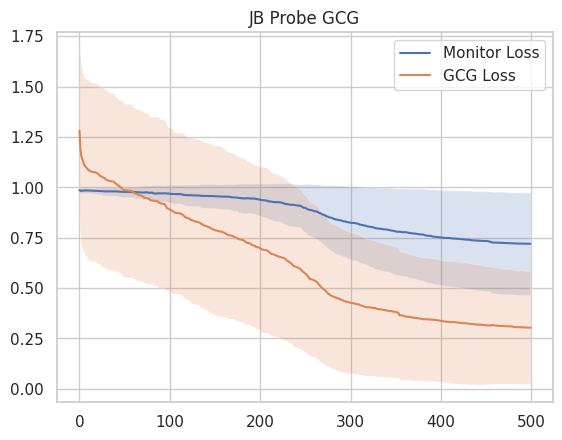

In [5]:
sns.set(style='whitegrid')
plt.plot(jb_monitor_losses.mean(axis=0), label='Monitor Loss')
plt.plot(jb_gcg_losses.mean(axis=0), label='GCG Loss')
plt.fill_between(range(500), jb_monitor_losses.mean(axis=0) - jb_monitor_losses.std(axis=0), jb_monitor_losses.mean(axis=0) + jb_monitor_losses.std(axis=0), alpha=0.2)
plt.fill_between(range(500), jb_gcg_losses.mean(axis=0) - jb_gcg_losses.std(axis=0), jb_gcg_losses.mean(axis=0) + jb_gcg_losses.std(axis=0), alpha=0.2)
plt.legend()
plt.title('JB Probe GCG')
plt.show()

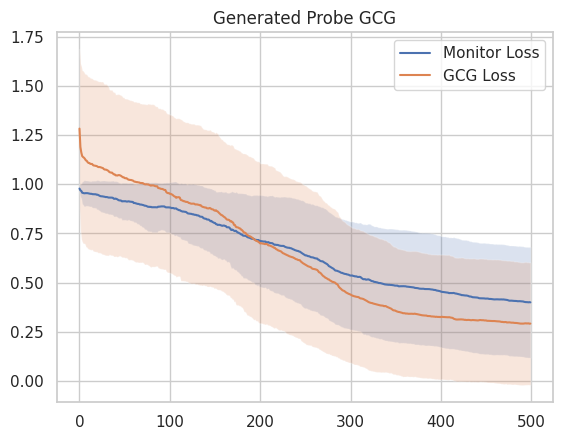

In [7]:
sns.set(style='whitegrid')
plt.plot(generated_monitor_losses.mean(axis=0), label='Monitor Loss')
plt.plot(generated_gcg_losses.mean(axis=0), label='GCG Loss')
plt.fill_between(range(500), generated_monitor_losses.mean(axis=0) - generated_monitor_losses.std(axis=0), generated_monitor_losses.mean(axis=0) + generated_monitor_losses.std(axis=0), alpha=0.2)
plt.fill_between(range(500), generated_gcg_losses.mean(axis=0) - generated_gcg_losses.std(axis=0), generated_gcg_losses.mean(axis=0) + generated_gcg_losses.std(axis=0), alpha=0.2)
plt.legend()
plt.title('Generated Probe GCG')
plt.show()

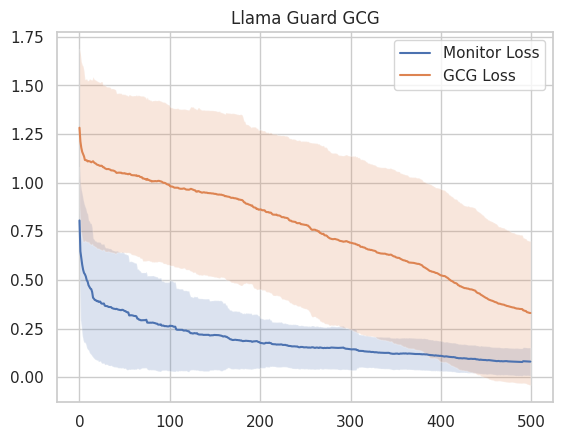

In [5]:
sns.set(style='whitegrid')
plt.plot(monitor_losses.mean(axis=0), label='Monitor Loss')
plt.plot(gcg_losses.mean(axis=0), label='GCG Loss')
plt.fill_between(range(500), monitor_losses.mean(axis=0) - monitor_losses.std(axis=0), monitor_losses.mean(axis=0) + monitor_losses.std(axis=0), alpha=0.2)
plt.fill_between(range(500), gcg_losses.mean(axis=0) - gcg_losses.std(axis=0), gcg_losses.mean(axis=0) + gcg_losses.std(axis=0), alpha=0.2)
plt.legend()
plt.title('Llama Guard GCG')
plt.show()

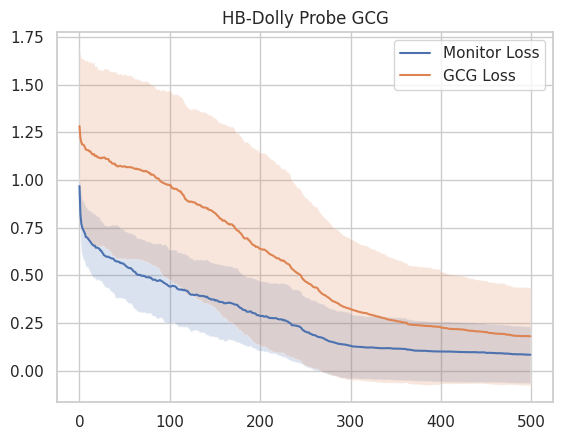

In [9]:
sns.set(style='whitegrid')
plt.plot(hb_dolly_monitor_losses.mean(axis=0), label='Monitor Loss')
plt.plot(hb_dolly_gcg_losses.mean(axis=0), label='GCG Loss')
plt.fill_between(range(500), hb_dolly_monitor_losses.mean(axis=0) - hb_dolly_monitor_losses.std(axis=0), hb_dolly_monitor_losses.mean(axis=0) + hb_dolly_monitor_losses.std(axis=0), alpha=0.2)
plt.fill_between(range(500), hb_dolly_gcg_losses.mean(axis=0) - hb_dolly_gcg_losses.std(axis=0), hb_dolly_gcg_losses.mean(axis=0) + hb_dolly_gcg_losses.std(axis=0), alpha=0.2)
plt.legend()
plt.title('HB-Dolly Probe GCG')
plt.show()

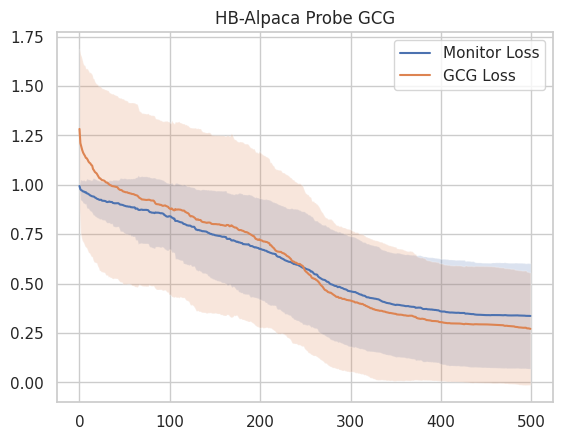

In [11]:
sns.set(style='whitegrid')
plt.plot(hb_alpaca_monitor_losses.mean(axis=0), label='Monitor Loss')
plt.plot(hb_alpaca_gcg_losses.mean(axis=0), label='GCG Loss')
plt.fill_between(range(500), hb_alpaca_monitor_losses.mean(axis=0) - hb_alpaca_monitor_losses.std(axis=0), hb_alpaca_monitor_losses.mean(axis=0) + hb_alpaca_monitor_losses.std(axis=0), alpha=0.2)
plt.fill_between(range(500), hb_alpaca_gcg_losses.mean(axis=0) - hb_alpaca_gcg_losses.std(axis=0), hb_alpaca_gcg_losses.mean(axis=0) + hb_alpaca_gcg_losses.std(axis=0), alpha=0.2)
plt.legend()
plt.title('HB-Alpaca Probe GCG')
plt.show()